In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("../../data/evaluation/hawkes/mimic_II.pkl", "rb") as f:
    mimic = pickle.load(f)
    
with open("../../data/evaluation/hawkes/mooc.pkl", "rb") as f:
    mooc = pickle.load(f)
    
with open("../../data/evaluation/hawkes/stackOverflow.pkl", "rb") as f:
    stack = pickle.load(f)
    
with open("../../data/evaluation/hawkes/retweet.pkl", "rb") as f:
    retweet = pickle.load(f)

In [3]:
print("Number of paths:")
print("MIMIC-II: ", mimic["timestamps"].shape)
print("MOOC: ", mooc["timestamps"].shape)
print("Stackoverflow: ", stack["timestamps"].shape)
print("Retweets: ", retweet["timestamps"].shape)

Number of paths:
MIMIC-II:  (650,)
MOOC:  (7047,)
Stackoverflow:  (6633,)
Retweets:  (24000,)


In [4]:
def plot_sequence_length_histogram(data, dataset_name=""):
    lengths = [len(x) for x in data]
    plt.hist(lengths, bins=100)
    plt.xlabel("Sequence length")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of sequence lengths {dataset_name}")
    plt.show()
    
def plot_maximum_time_per_path(data, dataset_name=""):
    max_times = [x[-1] for x in data]
    plt.hist(max_times, bins=100)
    plt.xlabel("Maximum time")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of maximum times {dataset_name}")
    plt.show()

def plot_mark_counts(data, dataset_name=""):
    marks = np.unique(np.concatenate(data))
    counts = [np.sum([x == mark for x in np.concatenate(data)]) for mark in marks]
    plt.bar(marks, counts)
    plt.xlabel("Mark")
    plt.ylabel("Frequency")
    plt.title(f"Frequency of marks {dataset_name}")
    plt.show()
    
def plot_num_paths_per_mark(data, dataset_name=""):
    marks = np.unique(np.concatenate(data))
    counts = [np.sum([mark in x for x in data]) for mark in marks]
    plt.bar(marks, counts)
    plt.xlabel("Mark")
    plt.ylabel("Frequency")
    plt.title(f"Number of paths containing mark {dataset_name}")
    plt.show()
    
def plot_bulk_ratio_per_mark(data, dataset_name=""):
    marks = np.unique(np.concatenate(data))
    bulk_ratios = []
    for mark in marks:
        points_with_mark = 0
        total_points = 0
        for x in data:
            if mark in x:
                points_with_mark += np.count_nonzero(x == mark)
                total_points += len(x)
        bulk_ratios.append((total_points-points_with_mark) / total_points)
    plt.bar(marks, bulk_ratios)
    plt.xlabel("Mark")
    plt.ylabel("Bulk ratio")
    plt.title(f"Bulk ratio of mark {dataset_name}")
    plt.show()
            

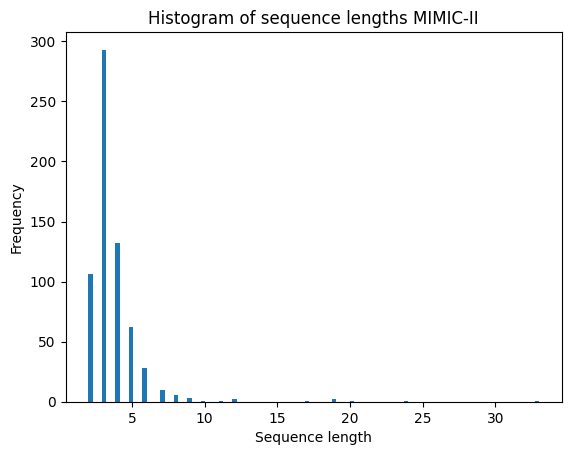

In [5]:
plot_sequence_length_histogram(mimic["timestamps"], "MIMIC-II")

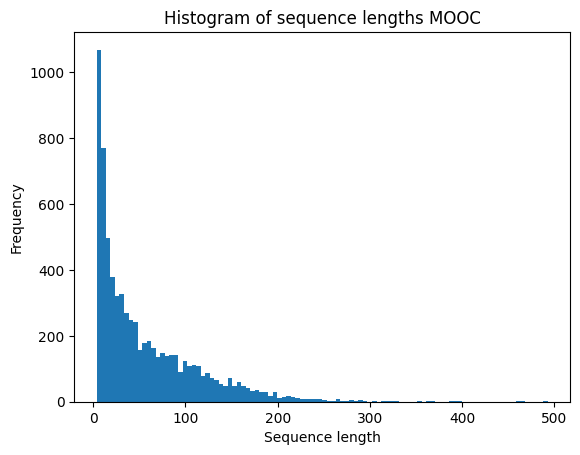

In [6]:
plot_sequence_length_histogram(mooc["timestamps"], "MOOC")

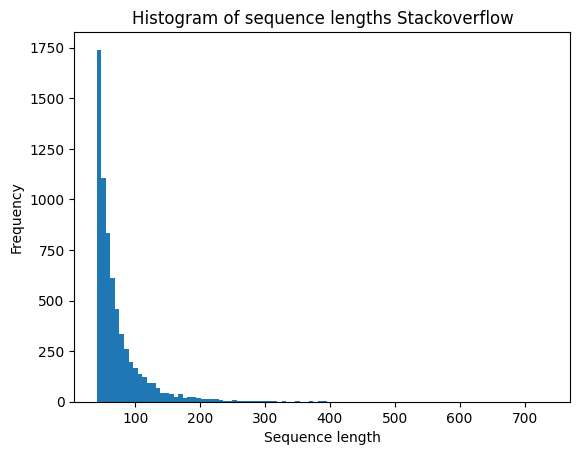

In [7]:
plot_sequence_length_histogram(stack["timestamps"], "Stackoverflow")

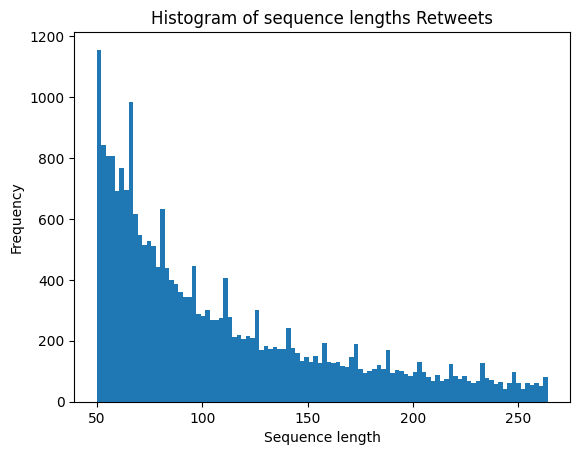

In [8]:
plot_sequence_length_histogram(retweet["timestamps"], "Retweets")

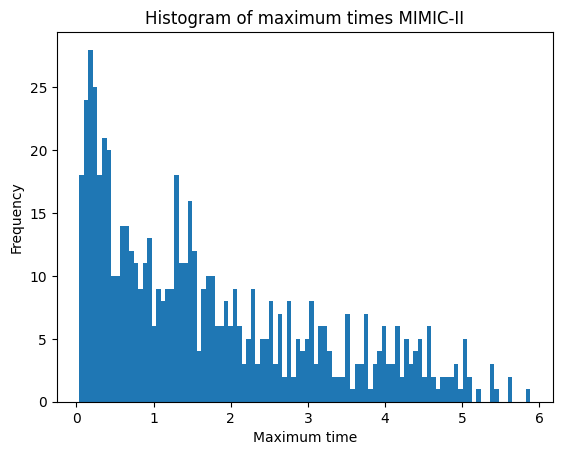

In [9]:
plot_maximum_time_per_path(mimic["timestamps"], "MIMIC-II")

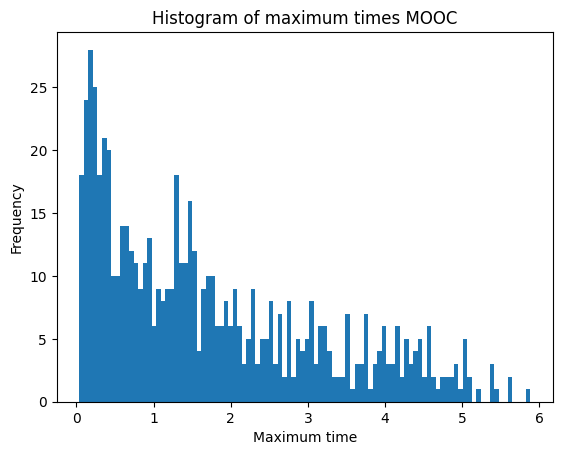

In [10]:
plot_maximum_time_per_path(mimic["timestamps"], "MOOC")

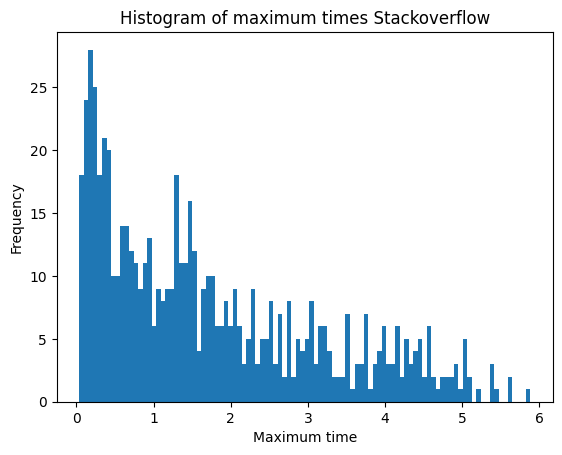

In [11]:
plot_maximum_time_per_path(mimic["timestamps"], "Stackoverflow")

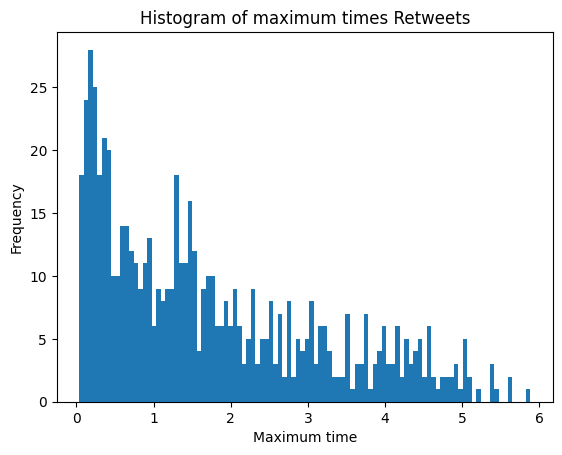

In [12]:
plot_maximum_time_per_path(mimic["timestamps"], "Retweets")

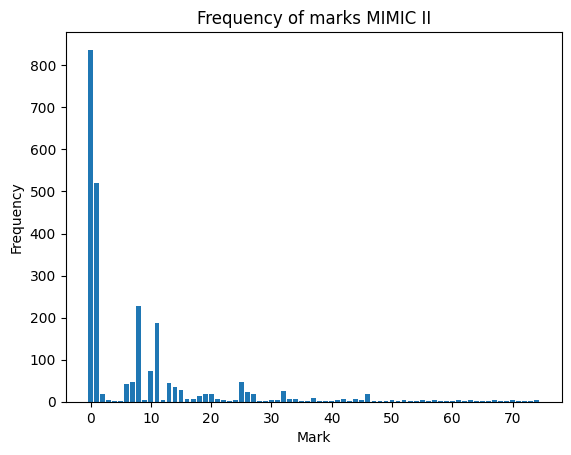

In [13]:
plot_mark_counts(mimic["types"], "MIMIC II")

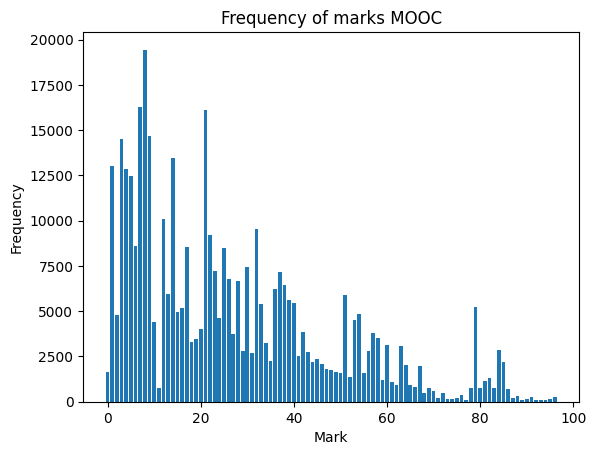

In [14]:
plot_mark_counts(mooc["types"], "MOOC")

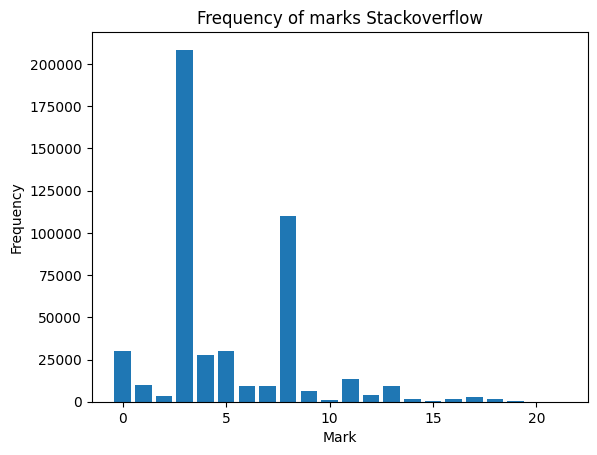

In [15]:
plot_mark_counts(stack["types"], "Stackoverflow")

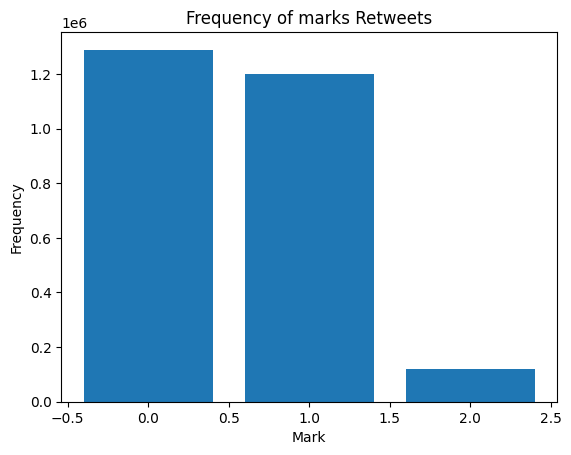

In [16]:
plot_mark_counts(retweet["types"], "Retweets")

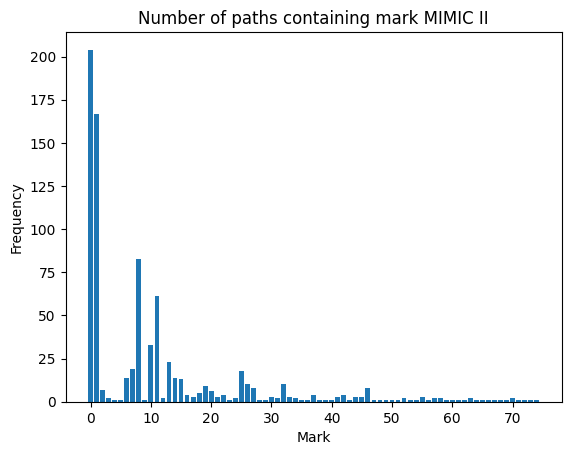

In [17]:
plot_num_paths_per_mark(mimic["types"], "MIMIC II")

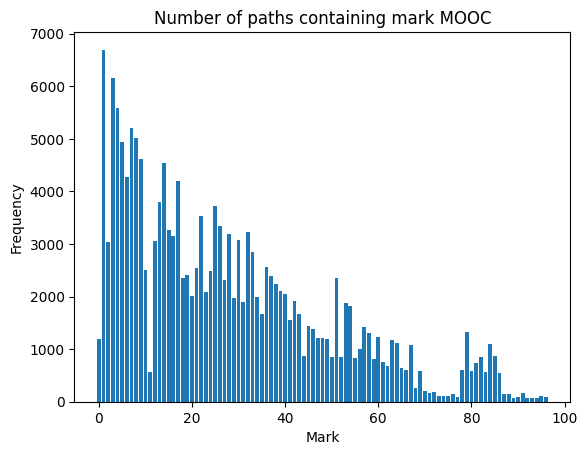

In [18]:
plot_num_paths_per_mark(mooc["types"], "MOOC")

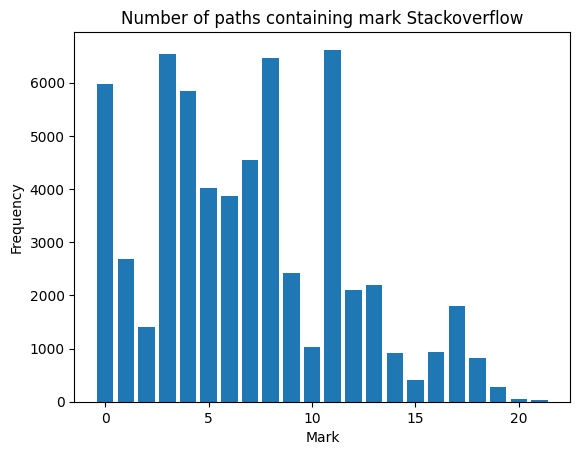

In [19]:
plot_num_paths_per_mark(stack["types"], "Stackoverflow")

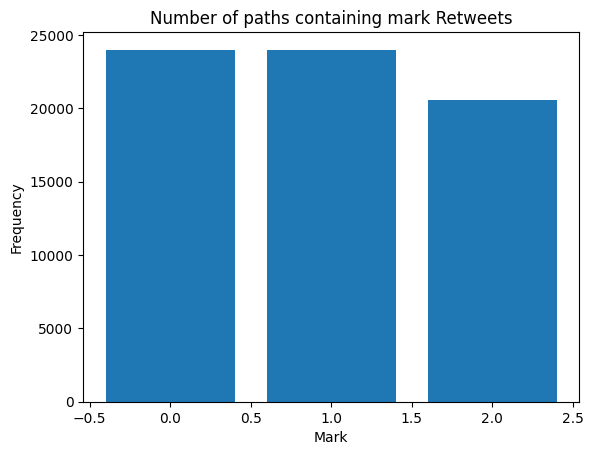

In [20]:
plot_num_paths_per_mark(retweet["types"], "Retweets")

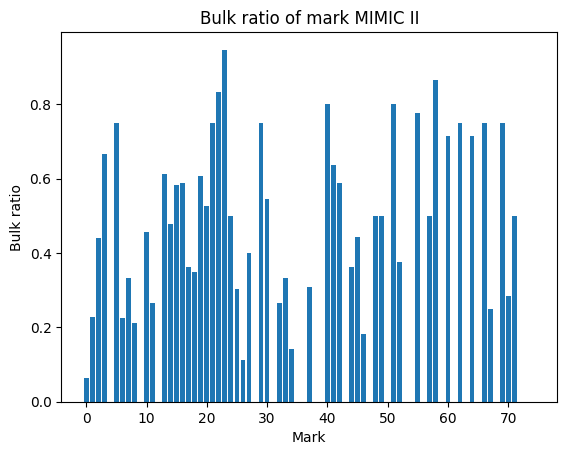

In [21]:
plot_bulk_ratio_per_mark(mimic["types"], "MIMIC II")

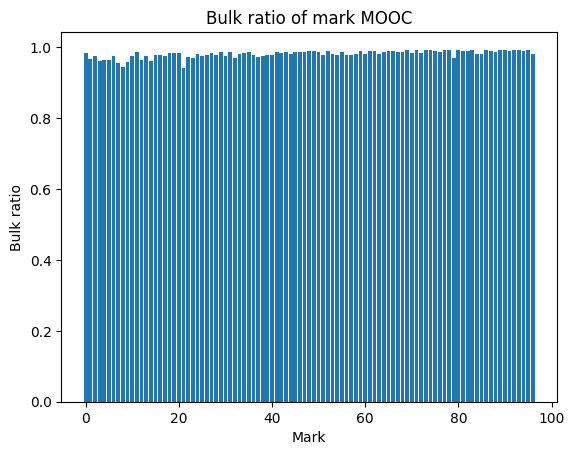

In [22]:
plot_bulk_ratio_per_mark(mooc["types"], "MOOC")

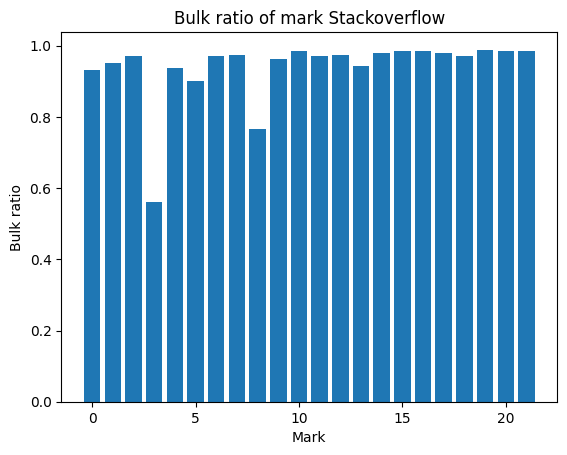

In [23]:
plot_bulk_ratio_per_mark(stack["types"], "Stackoverflow")

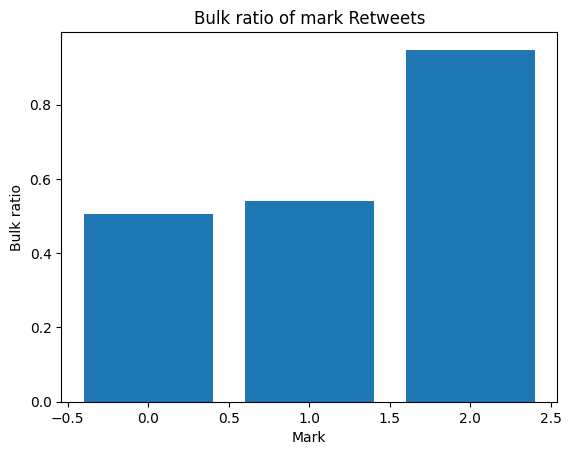

In [24]:
plot_bulk_ratio_per_mark(retweet["types"], "Retweets")